# K均值算法说明文档

## 简介
K均值算法是一种常用的聚类算法，旨在将数据集分成K个簇（cluster），每个簇由相似的数据点组成。该算法通过迭代优化簇的中心点（质心）来最小化簇内数据点到质心的距离。

## 算法步骤
1. **选择K值**：确定要分成的簇的数量K。
2. **初始化质心**：随机选择K个数据点作为初始质心。
3. **分配数据点**：将每个数据点分配到距离最近的质心所属的簇。
4. **更新质心**：计算每个簇的质心，即簇内所有数据点的平均值。
5. **重复步骤3和4**：直到质心不再发生变化或达到预定的迭代次数。

## 优点
- 简单易懂，易于实现。
- 计算速度快，适用于大规模数据集。

## 缺点
- 需要预先指定K值，不适用于不知道簇数量的数据集。
- 对初始质心敏感，不同的初始质心可能导致不同的聚类结果。
- 可能陷入局部最优解。

## 代码

### sk的k means 和 k means ++ 比较

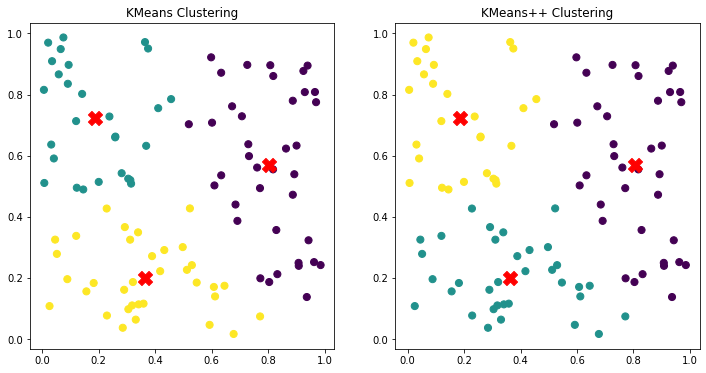

In [3]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# 生成随机数据
np.random.seed(42)
X = np.random.rand(100, 2)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 使用KMeans++进行聚类
kmeans_pp = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_pp.fit(X)
y_kmeans_pp = kmeans_pp.predict(X)

# 绘制聚类结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_pp, s=50, cmap='viridis')
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('KMeans++ Clustering')

plt.show()

### 使用 K-Means 完成图像压缩

(100109, array([0.24705882, 0.23529412, 0.2627451 ], dtype=float32))

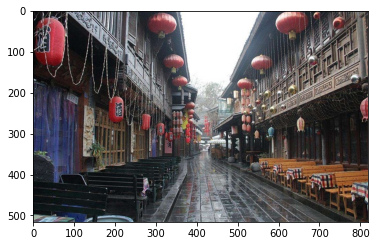

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

chengdu = mpimg.imread('challenge-7-chengdu.png') # 将图片加载为 ndarray 数组
plt.imshow(chengdu) # 将数组还原成图像

#数据格式变换
data = chengdu.reshape(516 * 819, 3)

"""计算像素点种类个数
"""
def get_variety(data):
    """
    参数:
    预处理后像素点集合

    返回:
    num_variety -- 像素点种类个数
    """

    temp=data.tolist()
    num_variety=len(set([tuple(t) for t in temp]))
    
    return num_variety

get_variety(data), data[20]

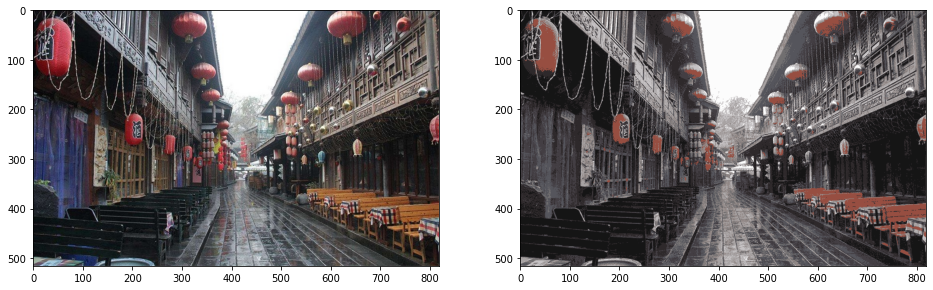

In [ ]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(10)
model.fit(data)
predict=model.predict(data)

new_colors = model.cluster_centers_[predict]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

new_chengdu = new_colors.reshape(chengdu.shape)
ax[0].imshow(chengdu)
ax[1].imshow(new_chengdu)